In [1]:
#data1 과 data2가 같은지 다른지 알고 싶다
# 귀무가설: 두 데이터는 차이가 없다
# 대립가설: 두 데이터는 차이가 있다=>내가 주장하고 싶은 가설
from scipy import stats
data1 = [4,6,17,16,8,9] # 관측치
data2 = [10,10,10,10,10,10] # 기대치
chis = stats.chisquare(data1, data2) # 카이제곱 검정: 두 데이터가 차이가 있는 지 검정
# 검정 통계량과 p-value 
chis
# pvalue(확률)가 0.05보다 작으므로 귀무가설 기각, 대립가설 채택
# pvalue<0.05 - 95% 신뢰수준
# pvalue<0.01 - 99% 신뢰수준
# 두 데이터는 차이가 있다

Power_divergenceResult(statistic=14.200000000000001, pvalue=0.014387678176921308)

In [2]:
import pandas as pd
from scipy import stats
survey=pd.read_csv("c:/data/smoke/survey.csv")
#survey
#Smoke Exer 와 필드를 기준으로 집계
data=pd.crosstab(survey.Smoke, survey.Exer) # 집계함수
print(data)
#카이제곱검정 수행
result=stats.chi2_contingency(observed=data)
print(result[0]) #검정통계량
print(result[1]) #p-value 점근유의확률
#p-value가 0.48로 0.05보다 크므로 흡연습관과 운동횟수에는 상관관계가 없다

Exer   Freq  None  Some
Smoke                  
Heavy     7     1     3
Never    87    18    84
Occas    12     3     4
Regul     9     1     7
5.488545890584232
0.48284216946545633


In [5]:
# 전체 학생들 중 20명의 학생들을 선택하여 전체 학생들의 평균키가 175cm 인지 아닌지 알고 싶다
# 귀무가설: 학생들의 평균키는  175cm 이다
# 대립가설: 학생들의 평균키는  175cm가 아니다
import numpy as np
from scipy import stats
# 랜덤 시드 설정 (같은 결과가 나옴)
np.random.seed(1)
# np.random.normal(0, 5) : 평균 0, 표준편차 5인 난수
heights = [180 + np.random.normal(0, 5) for a in range(20)]
#print(heights)
result = stats.ttest_1samp(heights, 175)
print(" 검정통계량: %.3f , p-value : %.3f" % result)
# p-value가 0.05보다 작으므로 95% 신뢰수준 하에서
# 학생들의 평균키는 통계적으로 유의하게 차이가 난다고 할 수 있음
# 따라서 귀무가설을 기각하고 대립가설을 채택한다. 즉, 학생들의 평균키는  175cm가 아니다.

 검정통계량: 3.435 , p-value : 0.003


In [7]:
# 1그룹과 2그룹 에서 각각 20명의 학생들을 선택하여 평균키가 같은지 다른지 알고 싶다.
# 귀무가설: 학생들의 평균키는 같다
# 대립가설: 학생들의 평균키는 같지 않다
import numpy as np
from scipy import stats
# 랜덤 시드 설정 (같은 결과가 나옴)
# np.random.seed(1)
# 1그룹 평균 표준편차: 170, 5 
group1 = [170 + np.random.normal(0, 5) for a in range(20)]
# 2그룹 평균 표준편차 : 175, 10
group2 = [175 + np.random.normal(0, 10) for a in range(20)]
print(group1)
print(group2)
print("group1의 평균 :",np.mean(group1))
print("group2의 평균 :",np.mean(group2))
#등분산 가정
result1 = stats.ttest_ind(group1, group2)
print("검정통계량 : %.3f , p-value : %.3f." % result1) 
#등분산 가정을 하지 않을 경우
result2 = stats.ttest_ind(group1, group2, equal_var=False)
print("검정통계량 : %.3f , p-value : %.3f." % result2)
# p-value가 0.05보다 작으므로 95% 신뢰수준 하에서
# 두 그룹 학생들의 평균키는 통계적으로 유의하게 차이가 난다고 할 수 있음
# 따라서 귀무가설을 기각하고 대립가설을 채택한다. 즉, 1그룹과 그룹 학생들의 평균키는 같지 않다

[166.22801029501673, 176.26434077616645, 172.56464910209004, 168.50953582448642, 172.44259073268748, 169.62214143489473, 175.65814693725713, 177.599084082111, 180.9278770326658, 163.0175183225593, 162.77943097285205, 167.47767068526775, 170.80018534723916, 174.38084460558113, 171.578174736208, 159.88899392087998, 168.46897993685815, 174.13987321303622, 171.15047367682192, 173.81005590156013]
[172.7767185738964, 172.99241931070003, 176.86561390988285, 179.10051647208257, 176.9829972012677, 176.19008645807457, 168.2933771371097, 178.7756378632092, 176.21821270991438, 186.29483907911919, 186.98917879901506, 176.85156417483944, 171.24715049909886, 168.61269592545779, 179.23494354064113, 175.7734006834856, 171.56146324428926, 175.43596856834247, 168.79999156051872, 181.9803203407222]
group1의 평균 : 170.86542887681196
group2의 평균 : 176.04885480258335
검정통계량 : -3.118 , p-value : 0.003.
검정통계량 : -3.118 , p-value : 0.003.


In [8]:
# 다이어트 약을 복용한 사람들 중 20명을 선택하여 복용 전후의 체중차이가 유의미한지 알고 싶다.
# 귀무 가설: 복용 전후의 체중 차이가 없다
# 대립 가설: 복용 전후의 체중 차이가 있다
import numpy as np
from scipy import stats
# 랜덤 시드 설정 (같은 결과가 나옴)
np.random.seed(1)
# 복용전: 평균 60 표준편차 5, normal(평균, 표준편차)
before = [60 + np.random.normal(0, 5) for _ in range(20)]
print(before)
# 복용후: 평균: 복용전체중x0.99 표준편차0.02
after = [w * np.random.normal(0.99, 0.02) for w in before]
print(after)
# 대응표본 t검정
result = stats.ttest_rel(before, after)
print("검정통계량 : %.3f , p-value : %.3f" % result)
# p-value가  0.05보다 작으므로 95% 신뢰수준 하에서
# 다이어트약 복용전후의 체중은 통계적으로 유의하게 차이가 난다고 할 수 있음
# 따라서 귀무가설을 기각하고 대립가설을 채택한다. 즉, 다이어트약 복용전후의 체중 차이가 있다.

[68.1217268183162, 56.94121793174962, 57.359141238682724, 54.63515688921915, 64.3270381466234, 48.492306515598585, 68.7240588210824, 56.19396549552449, 61.59519548028549, 58.75314812261295, 67.31053968522487, 49.69929645251173, 58.38791397993246, 58.07972822665792, 65.66884721167719, 54.500543663429845, 59.13785896224782, 55.61070791039314, 60.21106873357797, 62.914076068579114]
[65.94098797171107, 57.67544499710449, 57.819839215935254, 54.63788246116392, 64.84275566541605, 47.34427263203588, 67.86790793112998, 54.58033393455883, 60.64923115285458, 58.78881770728494, 65.70631311881824, 48.80793606499072, 57.001583230054315, 56.517144665313666, 64.13055954741337, 53.94173367626836, 57.224973536332286, 55.315321289307555, 61.60772730564428, 63.218635763189475]
검정통계량 : 2.915 , p-value : 0.009


In [9]:
# 독립표본 t검정: 2개의 서로 다른 그룹의 차이를 검정하는 기법
group1=[170+np.random.normal(0,5) for a in range(20)]
group2=[175+np.random.normal(0,10) for a in range(20)]
result1=stats.ttest_ind(group1, group2)
print(result1)

Ttest_indResult(statistic=-2.2501673523321517, pvalue=0.03030840533300645)


In [10]:
#대응표본 t검정
np.random.seed(1)
                                        #for문 20번 돌림
before=[60+np.random.normal(0,5) for _ in range(20)]
after=[w*np.random.normal(0.99, 0.02) for w in before]
result=stats.ttest_rel(before, after)
print(result)


Ttest_relResult(statistic=2.9154993563693186, pvalue=0.008871163766572827)


a평균 : 79.0
b평균 : 65.375
c평균 : 64.375
d평균 : 69.5


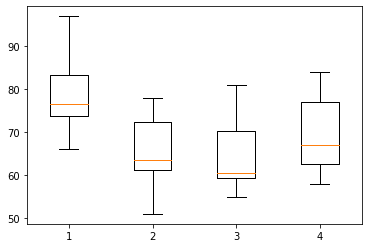

In [11]:
# 4 김부장은 개의 각기 다른 신입사원 교육훈련 기법의 효과성을 평가하고자 한다.
# 32 4 새로 입사한 명의 신입사원에게 가지 기법을 임의로 적용시켜 교육을 시켰다.
# 한 달간의 훈련기간이 끝난 후 표준 시험을 쳤는데 그 점수는 아래와 같다.
# 4 ? 개의 교육훈련 기법간 차이가 있는가 만약 있다면 어떻게 다른가?
#3개 이상의 대응표본을 비교해야 하므로 일원배치 분산분석 기법을 사용해야 한다.
# : 4 . 귀무가설 개의 교육훈련 기법간의 차이가 없다
# : 4 . 대립가설 개의 교육훈련 기법간의 차이가 있다
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
a = [66,74,82,75,73,97,87,78]
b = [72,51,59,62,74,64,78,63]
c = [61,60,57,60,81,55,70,71]
d = [63,61,76,84,58,65,69,80]
print("a평균 :",np.mean(a)) 
print("b평균 :",np.mean(b)) 
print("c평균 :",np.mean(c)) 
print("d평균 :",np.mean(d)) 
# matplotlib plotting
plot_data = [a,b,c,d]
plt.boxplot(plot_data)
plt.show()

In [13]:
f, p = stats.f_oneway(a, b, c, d)
print(f, p)
# : p-value 결과 분석 : p-value가      이므로
# 95% 신뢰수준 하에서 두 집단간 평균은 통계적으로 유의하게 차이가 난다고 할 수 있다.
# 따라서 통계적으로 볼 때 4개의 교육훈련 기법 간에는 차이가 난다고 잠정적으로 결론지을 수 있다.
# (boxplot)

4.2210931159803815 0.013933707427484199


In [14]:
data=pd.read_csv('c:/data/anova/fertilizers.csv')
result=stats.f_oneway(data['fertilizer1'], data['fertilizer2'], data['fertilizer3'])
result

F_onewayResult(statistic=3.7551268418654105, pvalue=0.04762461989261837)